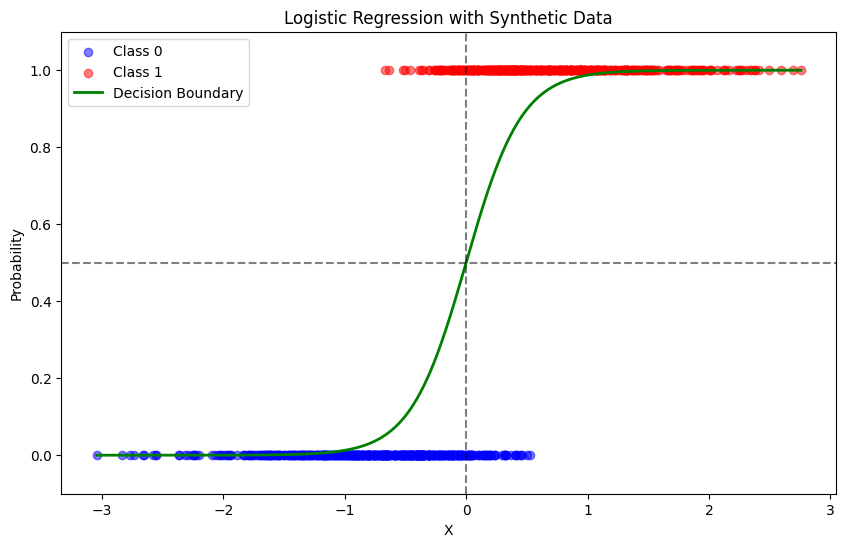

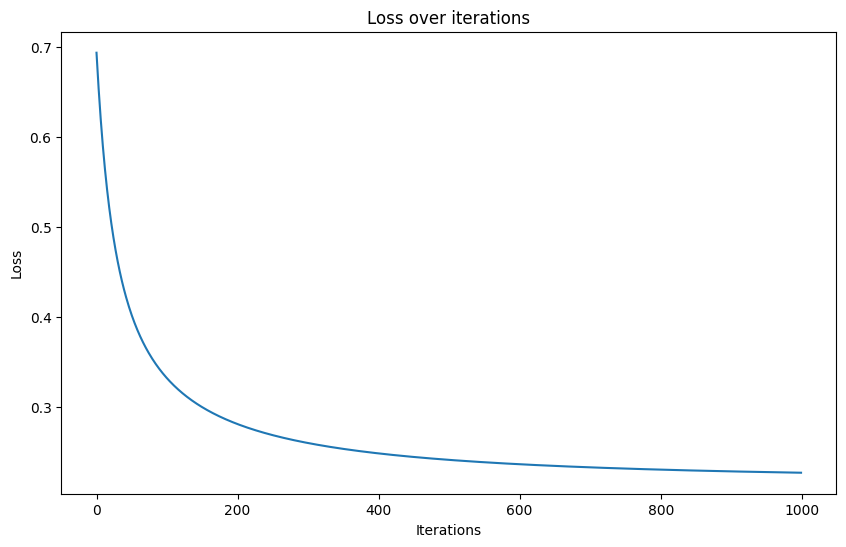

Final weights: [4.34875837]
Final bias: 0.0037762809092062983


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = np.random.randn(1000, 1)
y = (X + np.random.randn(1000, 1) * 0.3 > 0).astype(int).flatten()

#sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#loss function
def compute_loss(y_true, y_pred):
    epsilon = np.finfo(float).eps
    y1 = y_true * np.log(y_pred + epsilon)
    y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
    return -np.mean(y1 + y2)

#gradient descent - update weights and bias
def gradient_descent(X, y, learning_rate=0.1, n_iters=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    losses = []

    for _ in range(n_iters):
        z = np.dot(X, weights) + bias
        A = sigmoid(z)
        losses.append(compute_loss(y, A))
        dz = A - y
        dw = (1 / n_samples) * np.dot(X.T, dz)
        db = (1 / n_samples) * np.sum(dz)
        weights -= learning_rate * dw
        bias -= learning_rate * db
    
    return weights, bias, losses

# predict function
def predict(X, weights, bias):
    threshold = 0.5
    y_hat = np.dot(X, weights) + bias
    y_predicted = sigmoid(y_hat)
    y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]
    return np.array(y_predicted_cls)

# Train the model
weights, bias, losses = gradient_descent(X, y)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X[y==0], y[y==0], c='b', alpha=0.5, label='Class 0')
plt.scatter(X[y==1], y[y==1], c='r', alpha=0.5, label='Class 1')

# Plot decision boundary
X_plot = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
y_plot = sigmoid(np.dot(X_plot, weights) + bias)

plt.plot(X_plot, y_plot, 'g-', linewidth=2, label='Decision Boundary')

plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Logistic Regression with Synthetic Data')
plt.ylim(-0.1, 1.1)
plt.axhline(y=0.5, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over iterations')
plt.show()

print(f"Final weights: {weights}")
print(f"Final bias: {bias}")